**1. 손글씨 분류하기 **:  
손 글씨로 쓴 숫자를 분류하는 데이터 셋입니다,    
MNIST가 원조격입니다.       
손글씨 이미지 데이터는 1797개가 있고 각각의 이미지는  8x8의 64개 특성을 가집니다.    
label은 숫자 0~9의 10개 class를 포함하고 있습니다.  
지도학습 중 분류를 위한 모델인  
Decision Tree, Random Forest, SVM, SGD classifier, Logistic Regression 적용하였습니다.   


In [ ]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# 데이터 준비
digits = load_digits() 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
#feature data 지정하기
digits_data = digits.data
digits_data.shape

(1797, 64)

In [ ]:
#label data 지정하기 
digits_label = digits.target

#list 형태로 target names 출력
print(list(digits.target_names))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


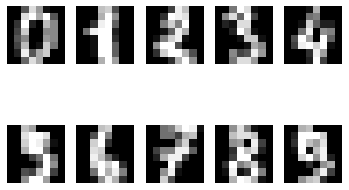

In [ ]:
#mnist 이미지 출력 
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
#data describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
#train, test 데이터 분리, shuffle=True 지정 
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7, shuffle=True)
                                                                                       

In [ ]:
'''Decision Tree'''
#모델 정의
decision_tree = DecisionTreeClassifier(random_state=32)

#모델 학습 
decision_tree.fit(X_train, y_train)

#모델 예측 
y_pred = decision_tree.predict(X_test)

#정확도 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [ ]:
'''Random Forest model1'''

#모델정의
random_forest = RandomForestClassifier(random_state=32)

#모델 학습
random_forest.fit(X_train, y_train)

#모델 예측
y_pred = random_forest.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9638888888888889

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [ ]:
'''SVM'''

#모델 정의
svm_model = svm.SVC()

#모델 학습
svm_model.fit(X_train, y_train)

#모델 예측
y_pred = svm_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9888888888888889

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



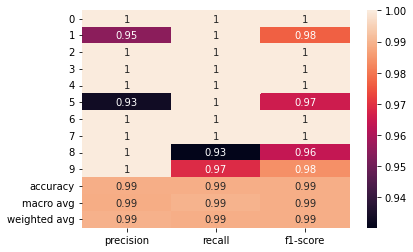

In [ ]:
#SVM 평가지표 heatmat으로 표현
labels = np.arange(10)
target_names = list("0123456789")
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1:].T, annot=True)

In [ ]:
'''SGD Classifier'''

#모델 정의
sgd_model = SGDClassifier()

#모델 학습
sgd_model.fit(X_train, y_train)

#모델 예측
y_pred = sgd_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9305555555555556

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.88      0.91        42
           2       0.97      0.97      0.97        40
           3       0.82      0.94      0.88        34
           4       0.97      0.97      0.97        37
           5       0.78      1.00      0.88        28
           6       0.93      0.96      0.95        28
           7       0.97      0.97      0.97        33
           8       0.95      0.84      0.89        43
           9       0.96      0.78      0.86        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



In [ ]:
'''Logistic Regression'''

#모델 정의
logistic_model = LogisticRegression()

#모델 학습
logistic_model.fit(X_train, y_train)

#모델 예측
y_pred = logistic_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9527777777777777

In [ ]:
print(classification_report(y_test, y_pred))#평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



**Discussion**  
**1. 모델 정확도:** SVM classifier의 정확도가 가장 높았습니다.   
Decision Tree acc:0.8555555555555555  
Random Forest acc:0.9638888888888889  
SVM acc:0.9888888888888889  
SGD Classifier acc:0.9138888888888889  
Logistic Regression acc:0.9527777777777777  
ensemble model인 random forest의 정확도가 가장 높을거라 예상 했으나 SVM model의 성능이 가장 좋았습니다.  
이는 mnist 같은 간단한 이미지 데이터를 svm의 seperating hyperlane이 거의 정확하게 분류한 결과로 보입니다.    

**2. 모델 평가:** 모델 평가는 정확도가 가장 좋았던 SVM model 위주로 회고 하겠습니다. SVM model의 classification report를 heatmap으로 시각화 하였는데 그 결과를 보면  
precision과 recall 그리고 f1-score 모두 0.95를 보였습니다. 이는 꽤 높은 성능을 보였다고 평가할 수 있습니다.  
손글씨 분류의 경우 정밀도와 재현율 하나를 택하기 보다는 다중 클래스의 분류가 중요하므로 전체적인 성능 비교가 필요합니다.  
따라서 정밀도와 재현율 모두를 반영한 F-score로 평가하는 것이 적합합니다.  
또한 digits dataset의 경우 불균형 데이터로 판단 되지 않기 때문에 f1-score의 weighted avg 보다는 f1-score의 macro avg(단순 평균) 또는 accuracy로 성능을 판단하면 되겠습니다. 


**2. 와인 종류 분류**  
**feature data:** 총 178개 데이터, 13개의 feature가 있습니다. 
'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'  
**label:** label은 3개의 class로 구성되고 각 클래스의 명칭은 '0, 1, 2'인데 각 class가 구체적으로 어떤 와인을 지칭하는지는 모르겠습니다.

In [ ]:
#데이터 준비
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
#wine data dataframe으로 표현하기 
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target #label 추가
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#feature data 지정
wine_feature_data = wine_data.data
wine_feature_data.shape

(178, 13)

In [ ]:
#label data 지정
wine_label = wine_data.target
wine_label[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#feature name 출력 
print(list(wine_data.feature_names))

#target name 출력
print(list(wine_data.target_names))

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0', 'class_1', 'class_2']


In [ ]:
#데이터 describe
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
#train, test 데이터 분리, random_state=0, shuffle=True 지정 
X_train, X_test, y_train, y_test = train_test_split(wine_feature_data, 
                                                    wine_label, 
                                                    test_size=0.2,
                                                    random_state=0, 
                                                    #shuffle=True
                                                    )

In [ ]:
'''Decision Tree'''

#모델 정의
decision_tree = DecisionTreeClassifier(random_state=32)

#모델 학습 
decision_tree.fit(X_train, y_train)

#모델 예측 
y_pred = decision_tree.predict(X_test)

#정확도 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



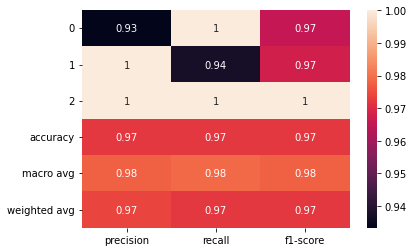

In [ ]:
#SVM 평가지표 heatmat으로 표현
labels = np.arange(3)
target_names = list("012")
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1:].T, annot=True)

In [ ]:
'''Random Forest'''

#모델 정의
random_forest = RandomForestClassifier(random_state=32)

#모델 학습
random_forest.fit(X_train, y_train)

#모델 예측
y_pred = random_forest.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
'''SVM'''

#모델 정의
svm_model = svm.SVC()

#모델 학습
svm_model.fit(X_train, y_train)

#모델 예측
y_pred = svm_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7777777777777778

In [ ]:
print(classification_report(y_test, y_pred))#평가지표

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.80      0.75      0.77        16
           2       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36



In [ ]:
'''SGD Classifier'''

#모델 정의
sgd_model = SGDClassifier()

#모델 학습
sgd_model.fit(X_train, y_train)

#모델 예측
y_pred = sgd_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5555555555555556

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       1.00      0.12      0.22        16
           2       0.28      0.83      0.42         6

    accuracy                           0.56        36
   macro avg       0.70      0.63      0.50        36
weighted avg       0.81      0.56      0.51        36



In [ ]:
'''Logistic Regression'''

#모델 정의
logistic_model = LogisticRegression()

#모델 학습
logistic_model.fit(X_train, y_train)

#모델 예측
y_pred = logistic_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9166666666666666

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      0.88      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



**Discussion**  
**1. 모델정확도**: 정확도의 경우 DecisionTree와 RandomForest가 0.9722222222222222로 동일하게 가장 높았습니다.  
의사결정 트리를 만들고 overfitting을 줄이는 효과로 정확도가 높게 나온 것으로 판단됩니다.  
Decision Tree가 RandomFrorest 보다 training time이 짧기 때문에 동일한 정확도라면 Decision Tree 모델을 활용하는 것이 효율적일 것입니다.  
Decision Tree acc:0.9722222222222222  
RandomForest acc:0.9722222222222222  
SVM acc:0.7777777777777778  
SGD acc:0.7777777777777778  
Logistic Regression acc:0.9166666666666666  

**2. 모델 평가:**accuracy가 가장 높았던 Decision Tree의 classification report를 heatmap으로 나타낸 것을 보면 precision, recall, f1-score 모두 동일하게 0.97로 나왔습니다.  
wine 분류의 경우 스펨메일 분류과 같이 precision(정밀도)가 재현율 보다 중요합니다.  
와인 분류를 정확하게 하는 것은 판매자나 소비자 입장에서 중요하겠지만 분류를 잘못했다 해서 업무상 큰 영향이 발생하지 않기 때문입니다.  






**3. breast cancer 음성/양성 분류**  
데이터 객체 569개, feature 30개, label은 Malignant(양성), Benign(음성)로 2 class로 구성 되어있습니다.    

In [ ]:
#데이터 불러오기
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#데이터 프레임으로 표현
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

#target column 추가
breast_cancer_df['target'] = breast_cancer.target
breast_cancer_df['target'] = breast_cancer_df['target'].map({1: 'M', 0: 'B'}) #M이면 양성, B는 음성 
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,B
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,B
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,B
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,B
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,B


In [ ]:
breast_cancer_data = breast_cancer.data
breast_cancer_data.shape #데이터 차원 확인

(569, 30)

In [ ]:
breast_cancer_label = breast_cancer.target
print(breast_cancer.target_names) #lable 이름 확인

['malignant' 'benign']


In [ ]:
print(breast_cancer.DESCR) #데이터 세부 정보 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#train, test data 분리
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=21, 
                                                    stratify= breast_cancer_label)

In [ ]:
'''Decision Tree'''

#모델 정의
decision_tree = DecisionTreeClassifier(random_state=32)

#모델 학습 
decision_tree.fit(X_train, y_train)

#모델 예측 
y_pred = decision_tree.predict(X_test)

#정확도 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9385964912280702

In [ ]:
print(classification_report(y_test, y_pred))#평가지표

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
'''Random Forest'''

#모델 정의
random_forest = RandomForestClassifier(random_state=32)

#모델 학습
random_forest.fit(X_train, y_train)

#모델 예측
y_pred = random_forest.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9649122807017544

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



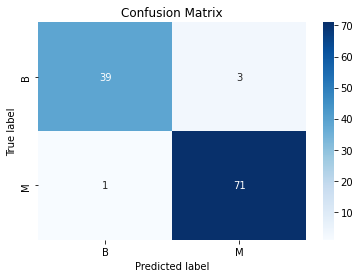

In [ ]:
#random forest가 best acc 
#confusion matrix를 heatmap으로 그리기 
ConfMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['B', 'M'], yticklabels = ['B', 'M'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix");

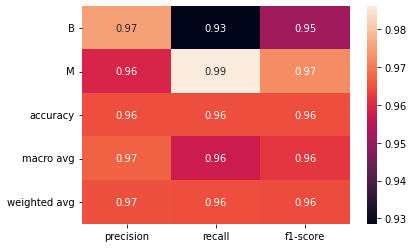

In [ ]:
#Random Forest 평가지표 heatmat으로 표현
labels = np.arange(2)
target_names = list("BM")
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1:].T, annot=True)

In [ ]:
'''SVM'''

#모델 정의
svm_model = svm.SVC()

#모델 학습
svm_model.fit(X_train, y_train)

#모델 예측
y_pred = svm_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8859649122807017

In [ ]:
print(classification_report(y_test, y_pred))#평가지표

              precision    recall  f1-score   support

           0       0.97      0.71      0.82        42
           1       0.86      0.99      0.92        72

    accuracy                           0.89       114
   macro avg       0.91      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114



In [ ]:
'''SGD Classifier'''

#모델 정의
sgd_model = SGDClassifier()

#모델 학습
sgd_model.fit(X_train, y_train)

#모델 예측
y_pred = sgd_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.868421052631579

In [ ]:
print(classification_report(y_test, y_pred))#평가지표

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.91      0.88      0.89        72

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



In [ ]:
'''Logistic Regression'''

#모델정의
logistic_model = LogisticRegression()

#모델 학습
logistic_model.fit(X_train, y_train)

#모델 예측
y_pred = logistic_model.predict(X_test)

#정확도
accuracy = accuracy_score(y_test, y_pred)
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9298245614035088

In [ ]:
print(classification_report(y_test, y_pred)) #평가지표

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.93      0.96      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



**Discussion**  
**1.모델 정확도**:Random Forest의 accuracy가 0.9649122807017544로 가장 높았습니다.  
Decision Tree acc:0.9385964912280702  
Random Forest acc:0.9649122807017544  
SVM acc:0.8859649122807017  
SGD acc:0.868421052631579  
Logistic Regression:0.9298245614035088  
  
**2.모델 성능 평가**:암을 진단하는 경우 재현율(recall)로 모델의 성능을 평가합니다.  
실제로 양성인데 음성으로 판단되는 환자인 경우 치료 받을 수 있는 기회를 놓치기 때문입니다.  
따라서 recall 값이 100%에 가깝게 나오는 모델을 만드는 것이 중요합니다.  
randomforest의 recall weighted avg와 macro avg가 모두 동일하게 0.96이 나왔는데 이는 불충분한 모델로 전체 정확도가 떨어져도 recall 값을 100%가 나오는 모델을 만들었으면 어땠을까하는 아쉬움이 있습니다.  


